# 01 - Introduction to Time Series Analysis

by [Alejandro Correa Bahnsen](albahnsen.com/)

version 1.0, June 2020

## Part of the class [Advanced Methods in Data Analysis](https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass)



This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [TAVISH SRIVASTAVA]()

# Introduction

‘Time’ is the most important factor which ensures success in a business. It’s difficult to keep up with the pace of time.  But, technology has developed some powerful methods using which we can ‘see things’ ahead of time. 

I’m talking about the methods of prediction & forecasting. One such method, which deals with time based data is Time Series Modeling. As the name suggests, it involves working on time (years, days, hours, minutes) based data, to derive hidden insights to make informed decision making.

Time series models are very useful models when you have serially correlated data. Most of business houses work on time series data to analyze sales number for the next year, website traffic, competition position and much more. However, it is also one of the areas, which many analysts do not understand.

So, if you aren’t sure about complete process of time series modeling, this guide would introduce you to various levels of time series modeling and its related techniques.

# 1. Time Series Modeling

Let’s begin from basics.  This includes stationary series, random walks , Rho Coefficient, Dickey Fuller Test of Stationarity. If these terms are already scaring you, don’t worry – they will become clear in a bit and I bet you will start enjoying the subject as I explain it.

## Stationary Series

A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

1. The mean of the series should not be a function of time rather should be a constant. The image below has the left hand graph satisfying the condition whereas the graph in red has a time dependent mean.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

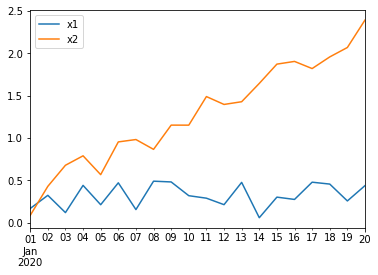

In [2]:
ts = pd.DataFrame(np.random.rand(20, 2)/2, 
                  index=pd.date_range("2020-01-01", periods=20),
                  columns=['x1', 'x2'])
ts['x2'] = [x+i/10 for i, x in enumerate(ts['x2'])]
ts.plot()

2. The variance of the series should not a be a function of time. This property is known as homoscedasticity. Following graph depicts what is and what is not a stationary series. 

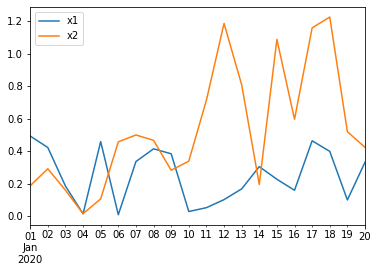

In [3]:
ts = pd.DataFrame(np.random.rand(20, 2)/2, 
                  index=pd.date_range("2020-01-01", periods=20),
                  columns=['x1', 'x2'])
ts['x2'] = [x if i<10 else x*3 for i, x in enumerate(ts['x2'])]
ts.plot()

3. The covariance of the i th term and the (i + m) th term should not be a function of time. In the following graph, you will notice the spread becomes closer as the time increases. Hence, the covariance is not constant with time for the ‘orange series’.

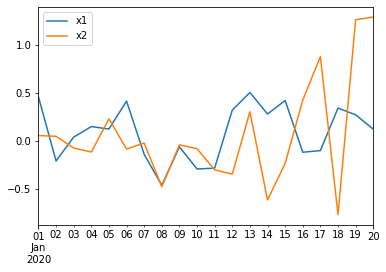

In [28]:
ts = pd.DataFrame(np.random.rand(20, 2) - 0.5, 
                  index=pd.date_range("2020-01-01", periods=20),
                  columns=['x1', 'x2'])
ts['x1'] = ts['x1'] + 0.1*ts['x1'].shift(1, fill_value=0)
ts['x2'] = (ts['x2'] + np.arange(20) * ts['x2'].shift(1, fill_value=0) )/6
ts.plot()

## Why do we care about stationarity of a time series?

The reason I took up this section first was that until unless your time series is stationary, you cannot build a time series model. In cases where the stationary criterion are violated, the first requisite becomes to stationarize the time series and then try stochastic models to predict this time series. There are multiple ways of bringing this stationarity. Some of them are Detrending, Differencing etc.

## Random Walk
This is the most basic concept of the time series. You might know the concept well. But, I found many people in the industry who interprets random walk as a stationary process. In this section with the help of some mathematics, I will make this concept crystal clear for ever. Let’s take an example.

Example: Imagine a girl moving randomly on a giant chess board. In this case, next position of the girl is only dependent on the last position.



<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/RandomWalk.gif">

Now imagine, you are sitting in another room and are not able to see the girl. You want to predict the position of the girl with time. How accurate will you be? Of course you will become more and more inaccurate as the position of the girl changes. At t=0 you exactly know where the girl is. Next time, she can only move to 8 squares and hence your probability dips to 1/8 instead of 1 and it keeps on going down. Now let’s try to formulate this series :



`X(t) = X(t-1) + Er(t)`

where Er(t) is the error at time point t. This is the randomness the girl brings at every point in time.

Now, if we recursively fit in all the Xs, we will finally end up to the following equation :

`X(t) = X(0) + Sum(Er(1),Er(2),Er(3).....Er(t))`

Now, lets try validating our assumptions of stationary series on this random walk formulation:


1. Is the Mean constant ?

`E[X(t)] = E[X(0)] + Sum(E[Er(1)],E[Er(2)],E[Er(3)].....E[Er(t)])`

We know that Expectation of any Error will be zero as it is random.

Hence we get 

`E[X(t)] = E[X(0)] = Constant`.

 

2. Is the Variance constant?

`Var[X(t)] = Var[X(0)] + Sum(Var[Er(1)],Var[Er(2)],Var[Er(3)].....Var[Er(t)])`

`Var[X(t)] = t * Var(Error) = Time dependent.`

Hence, we infer that the random walk is not a stationary process as it has a time variant variance. Also, if we check the covariance, we see that too is dependent on time.

# Rho

We already know that a random walk is a non-stationary process. Let us introduce a new coefficient in the equation to see if we can make the formulation stationary.

`X(t) = Rho * X(t-1) + Er(t)`

Let’s start with a perfectly stationary series with Rho = 0 . Here is the plot for the time series :

In [47]:
i

1

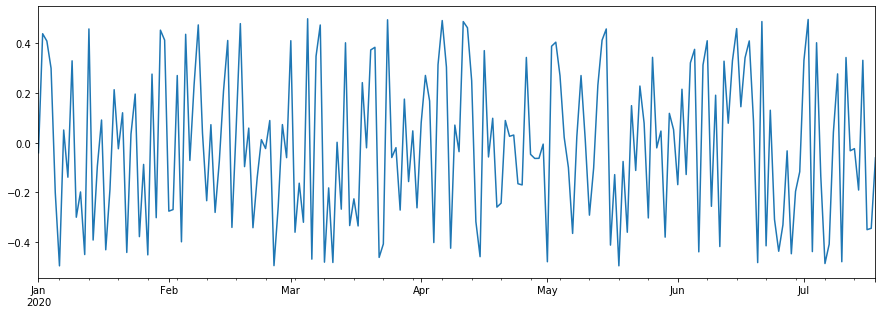

In [49]:
def ts(rho):
    ts = pd.Series(np.random.rand(200) - 0.5, index=pd.date_range("2020-01-01", periods=200))
    
    for i in range(1, ts.shape[0]):
        ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]    
    ts.plot(figsize=(15, 5))
ts(rho=0)

Increase the value of Rho to 0.5 gives us following graph :

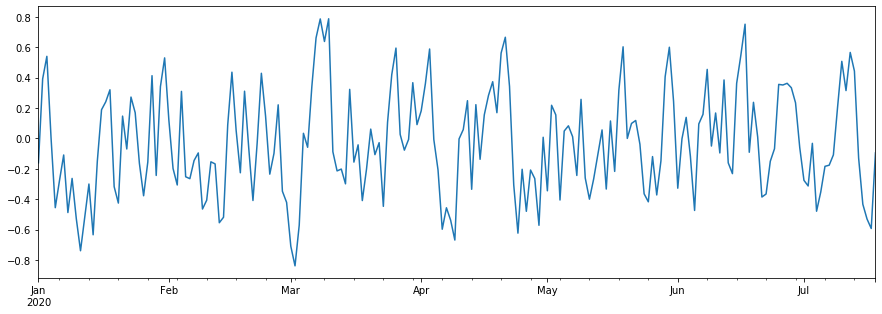

In [50]:
ts(rho=0.5)

You might notice that our cycles have become broader but essentially there does not seem to be a serious violation of stationary assumptions. Let’s now take a more extreme case of Rho = 0.9

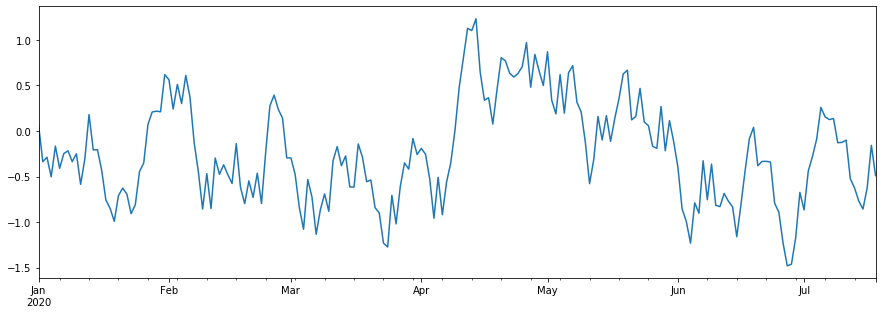

In [51]:
ts(rho=0.9)

We still see that the X returns back from extreme values to zero after some intervals. This series also is not violating non-stationarity significantly. Now, let’s take a look at the random walk with rho = 1.



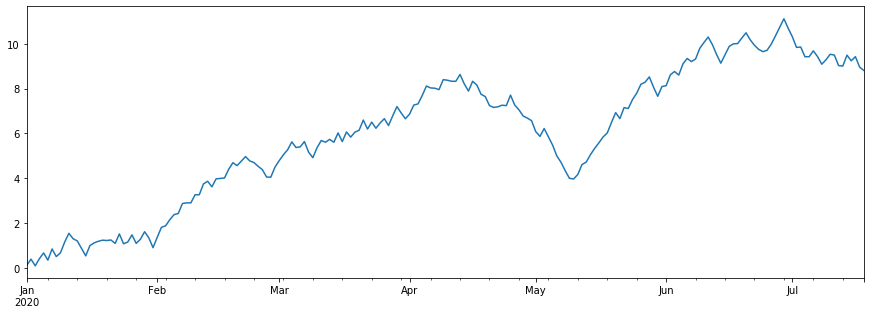

In [52]:
ts(rho=1)

This obviously is an violation to stationary conditions. What makes rho = 1 a special case which comes out badly in stationary test? We will find the mathematical reason to this.

Let’s take expectation on each side of the equation  “X(t) = Rho * X(t-1) + Er(t)”

`E[X(t)] = Rho *E[ X(t-1)]`

This equation is very insightful. The next X (or at time point t) is being pulled down to Rho * Last value of X.

For instance, if X(t – 1 ) = 1, E[X(t)] = 0.5 ( for Rho = 0.5) . Now, if X moves to any direction from zero, it is pulled back to zero in next step. The only component which can drive it even further is the error term. Error term is equally probable to go in either direction. What happens when the Rho becomes 1? No force can pull the X down in the next step.

## Dickey Fuller Test of Stationarity

What you just learnt in the last section is formally known as Dickey Fuller test. Here is a small tweak which is made for our equation to convert it to a Dickey Fuller test:

`X(t) = Rho * X(t-1) + Er(t)`

`=>  X(t) - X(t-1) = (Rho - 1) X(t - 1) + Er(t)`

We have to test if Rho – 1 is significantly different than zero or not. If the null hypothesis gets rejected, we’ll get a stationary time series.

Stationary testing and converting a series into a stationary series are the most critical processes in a time series modelling. You need to memorize each and every detail of this concept to move on to the next step of time series modelling.


In [53]:
from statsmodels.tsa.stattools import adfuller

In [54]:
def ts(rho):
    ts = pd.Series(np.random.rand(200) - 0.5, index=pd.date_range("2020-01-01", periods=200))
    
    for i in range(1, ts.shape[0]):
        ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]    
    return ts

ADF Statistic: -8.137854
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


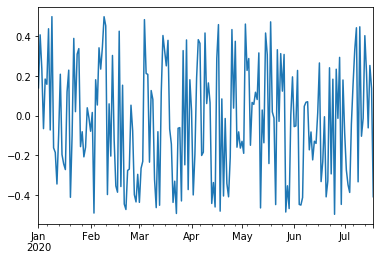

In [58]:
ts1 = ts(rho=0)
ts1.plot()
result = adfuller(ts1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))